<a href="https://colab.research.google.com/github/TowfiqulMozumder/Rainfall-Prediction/blob/master/Final_Car_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
c = pd.read_csv("/content/drive/My Drive/CSE445/Car Price Dataset.csv")

In [3]:
c.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
c.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
c['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [6]:
c['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [7]:
c['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

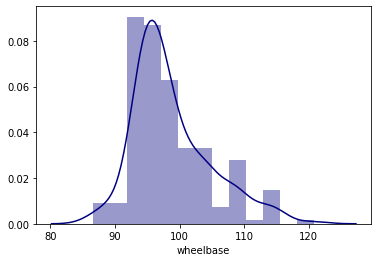

In [8]:
sns.distplot(c['wheelbase'],color='navy')

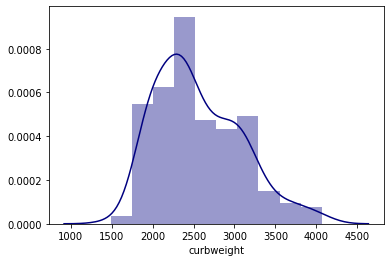

In [9]:
sns.distplot(c['curbweight'],color='navy')

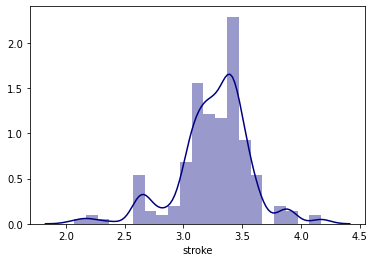

In [10]:
sns.distplot(c['stroke'],color='navy')
plt.show()

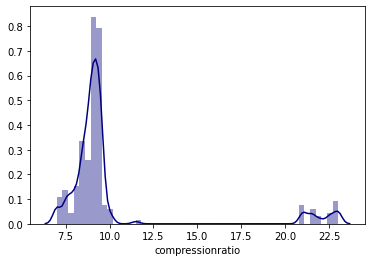

In [11]:
sns.distplot(c['compressionratio'],color='navy')
plt.show()

Text(0.5, 1.0, 'Cars Relative Frequency By Price')

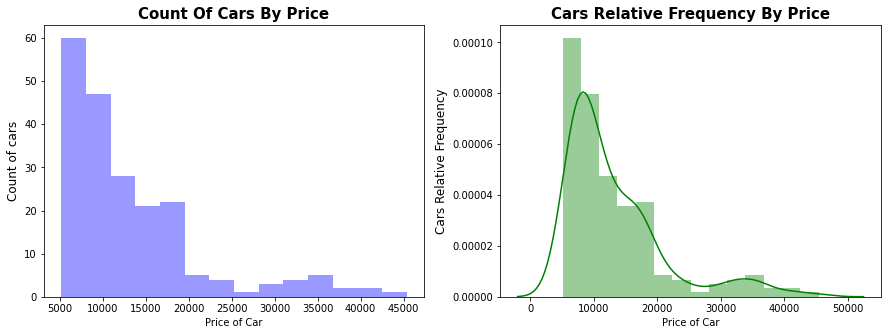

In [12]:
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(c['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Price of Car')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(c['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Price of Car')
ax[1].set_ylabel('Cars Relative Frequency',size=12)
ax[1].set_title('Cars Relative Frequency By Price',size=15,weight="bold")

In [13]:
c_n=c.select_dtypes(include=['float64','int64'])
c_n.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
c_numeric = c_n.drop(['symboling', 'car_ID'], axis=1)
c_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 576x576 with 0 Axes>

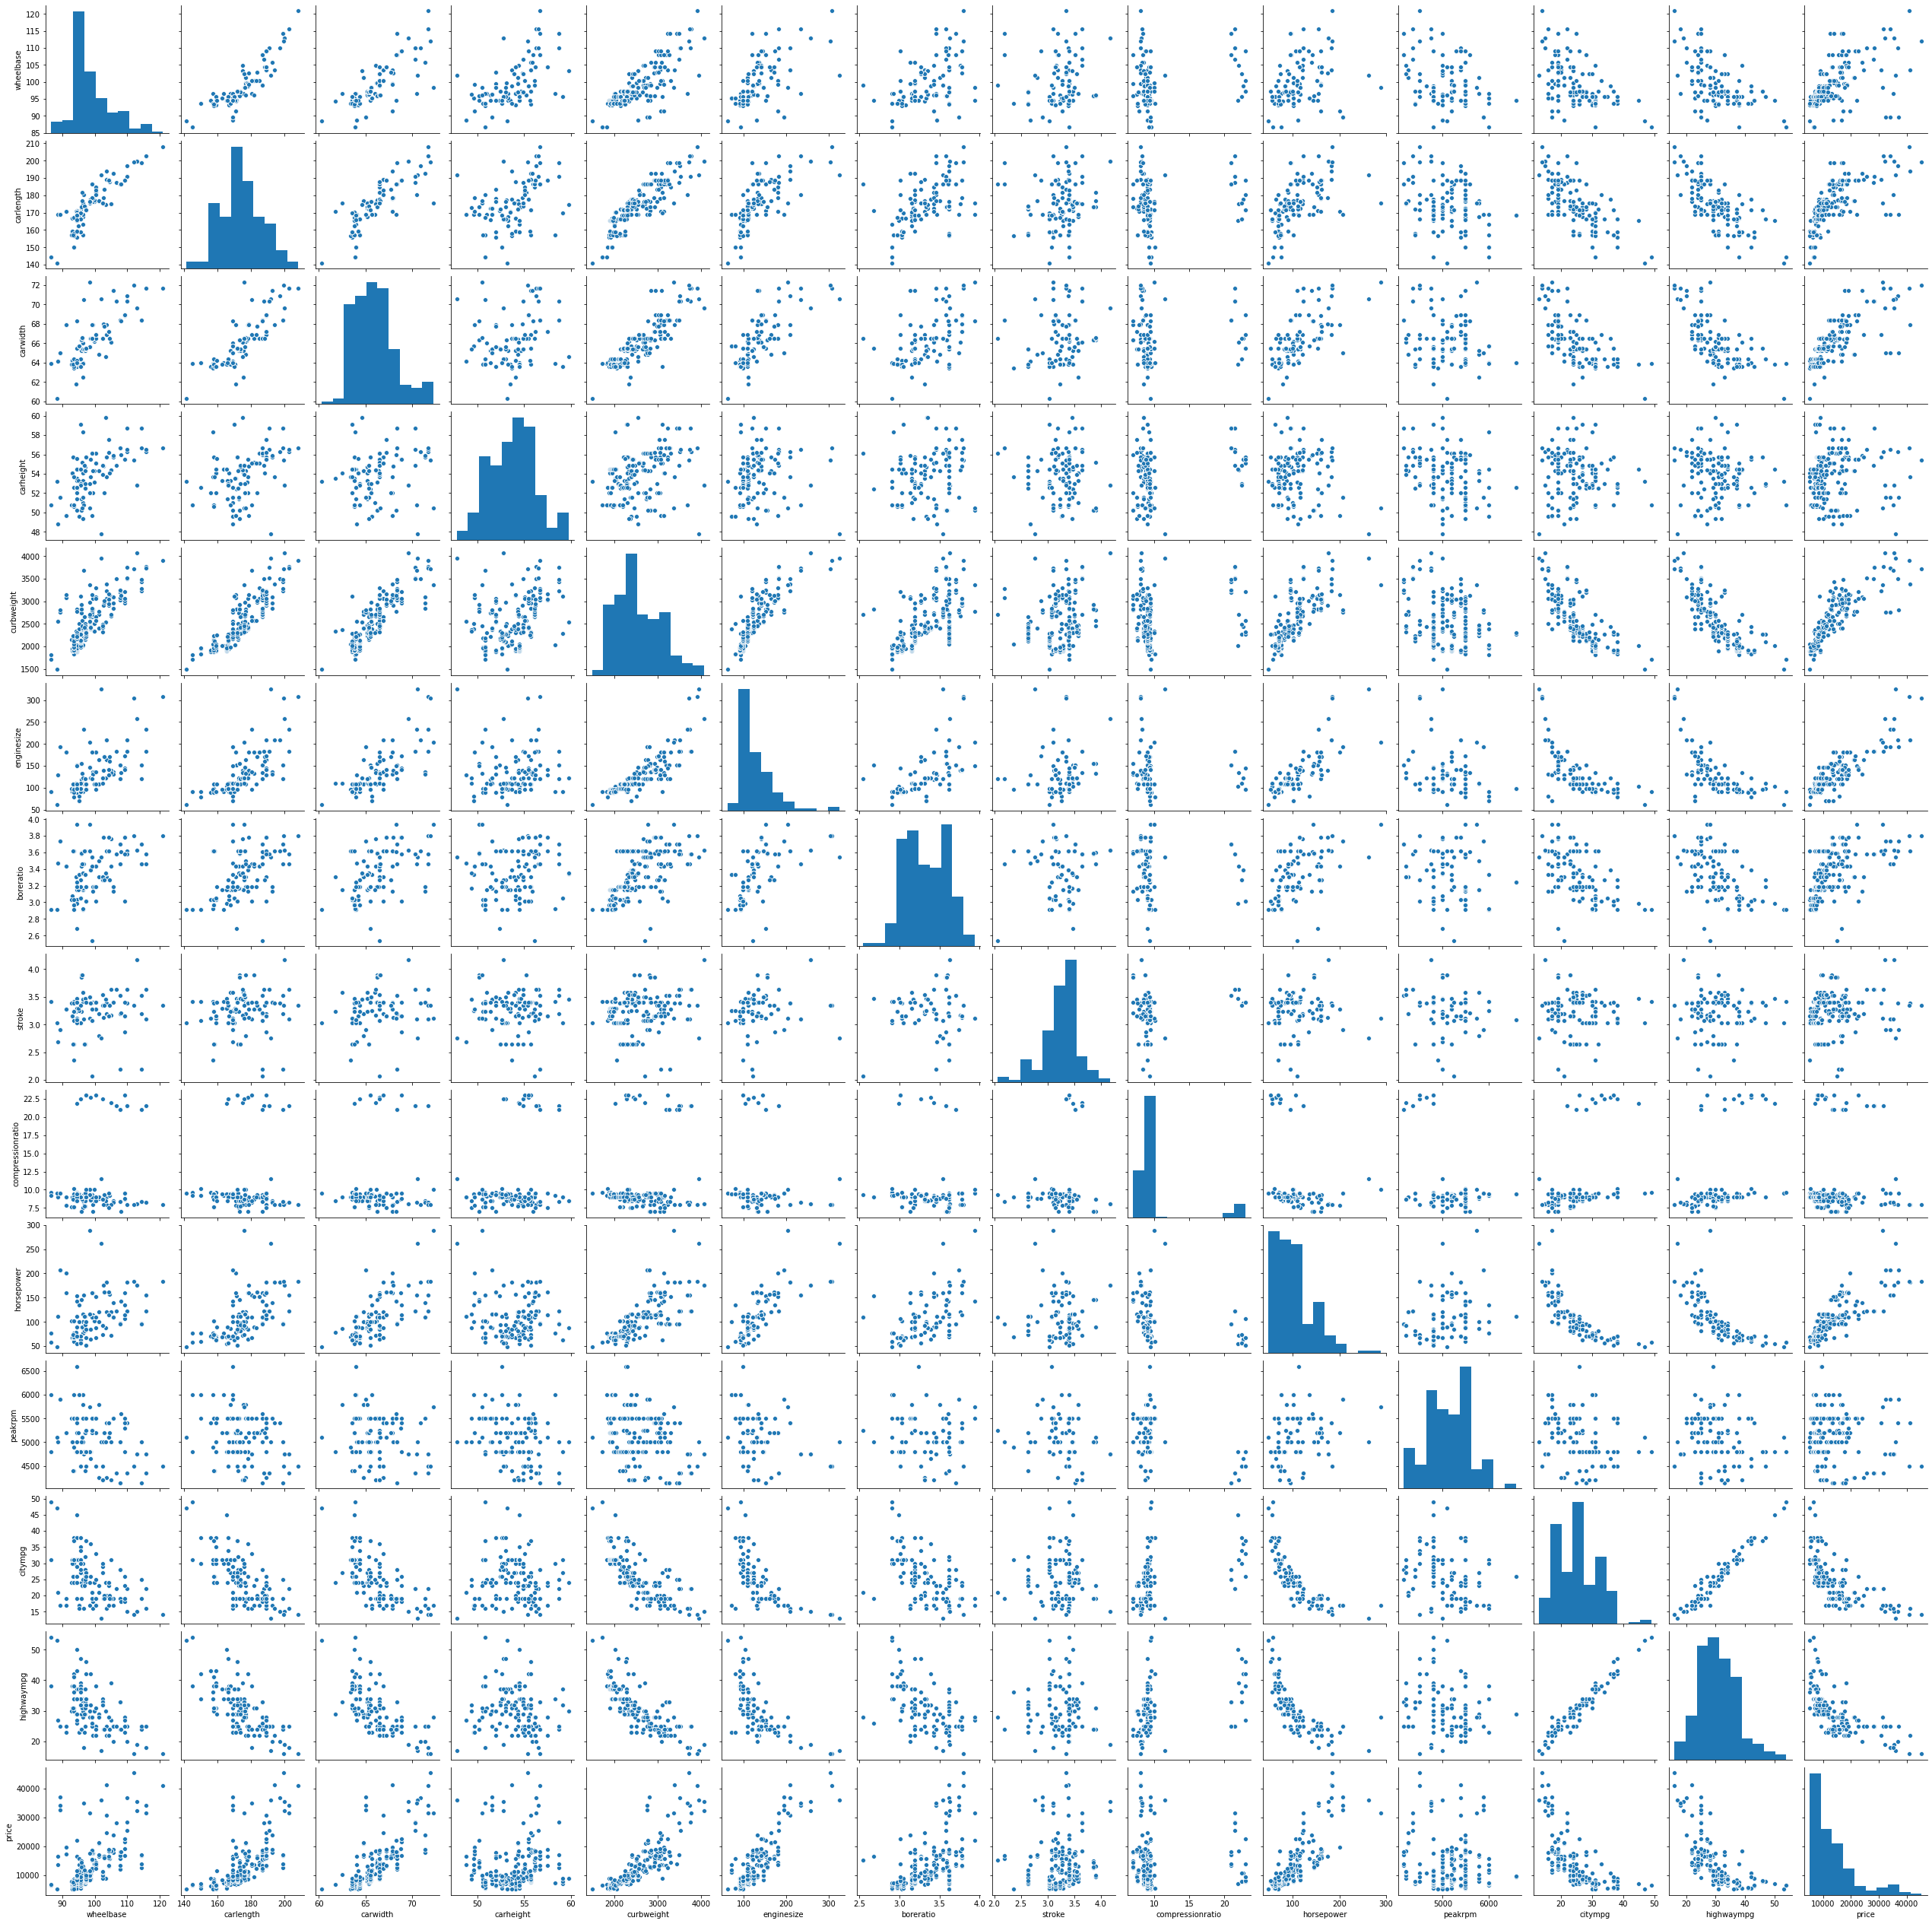

In [15]:
plt.figure(figsize=(8, 8))
sns.pairplot(c_numeric)

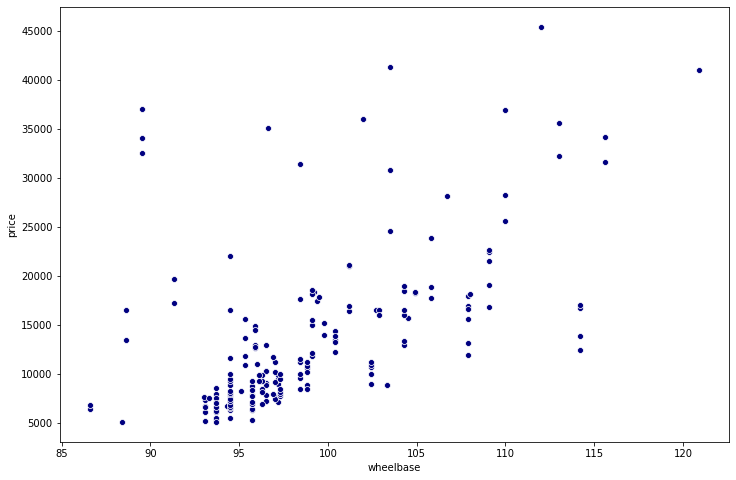

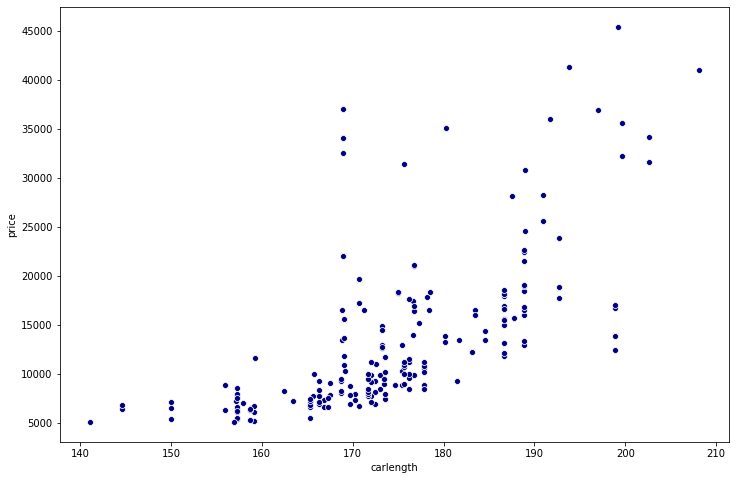

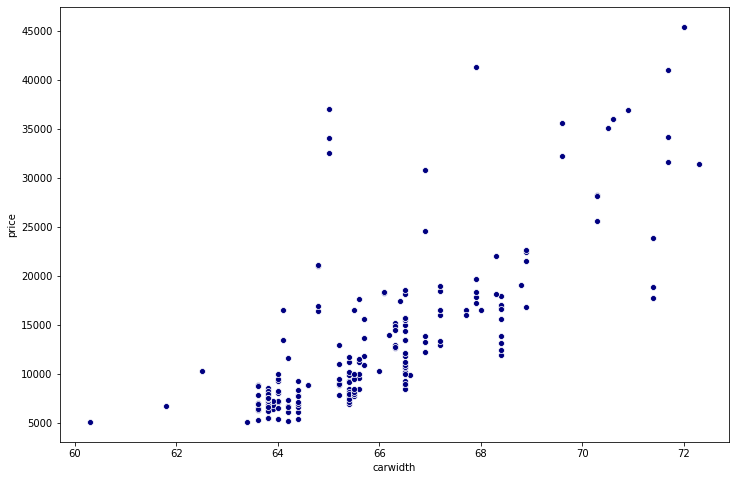

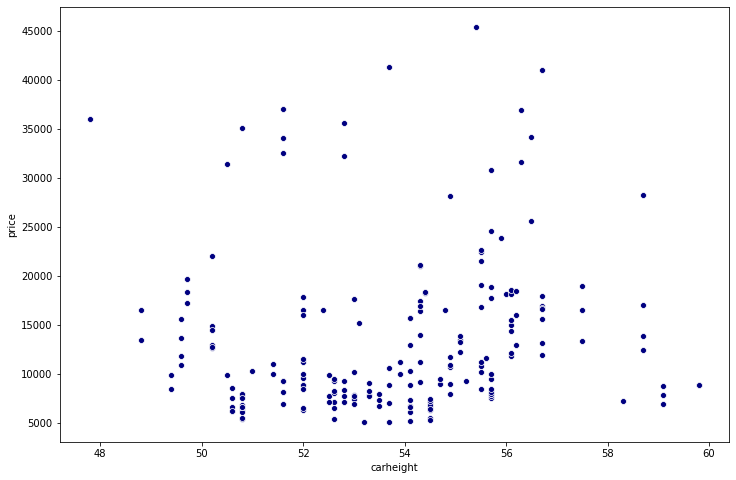

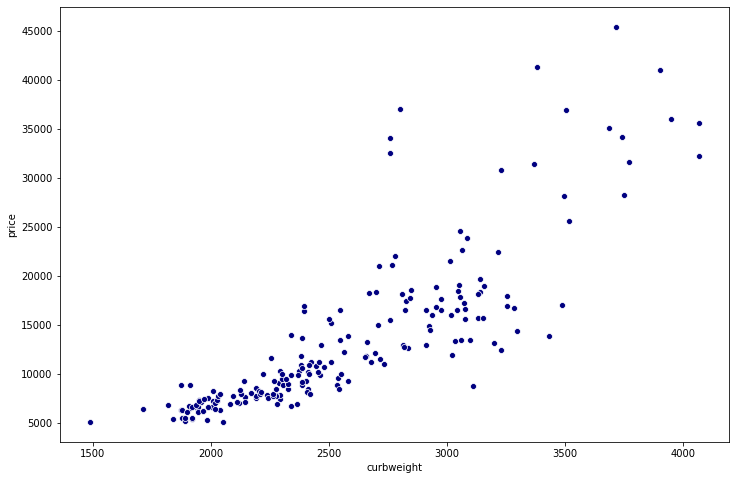

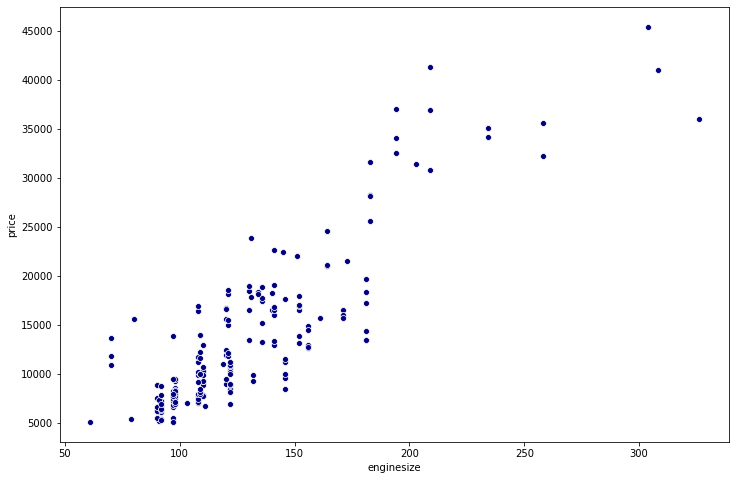

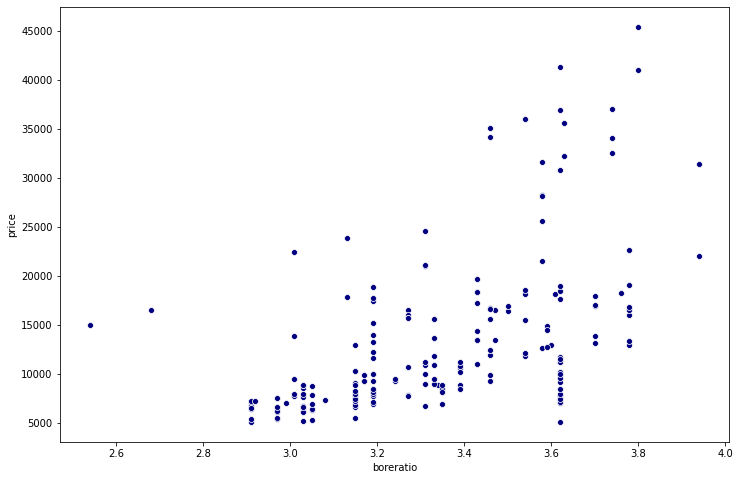

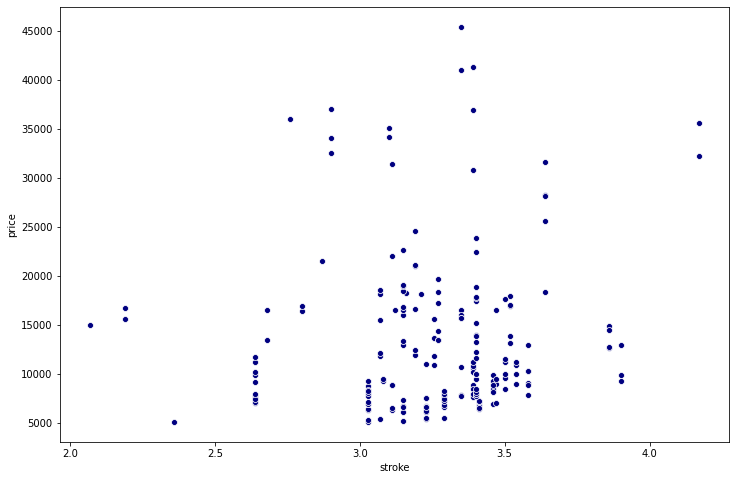

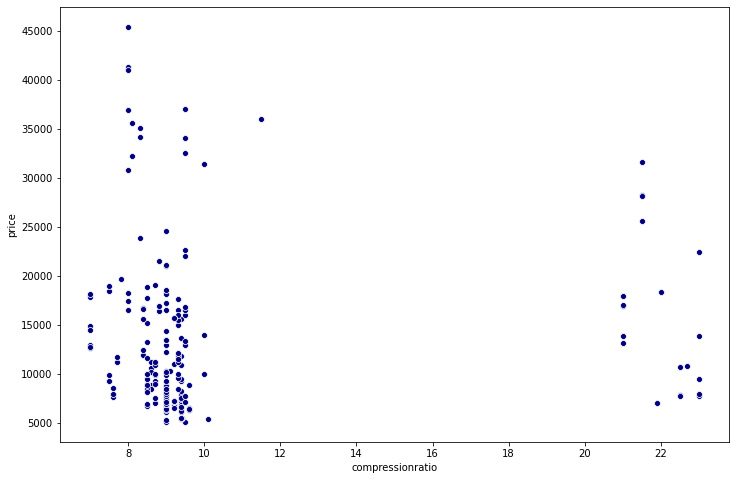

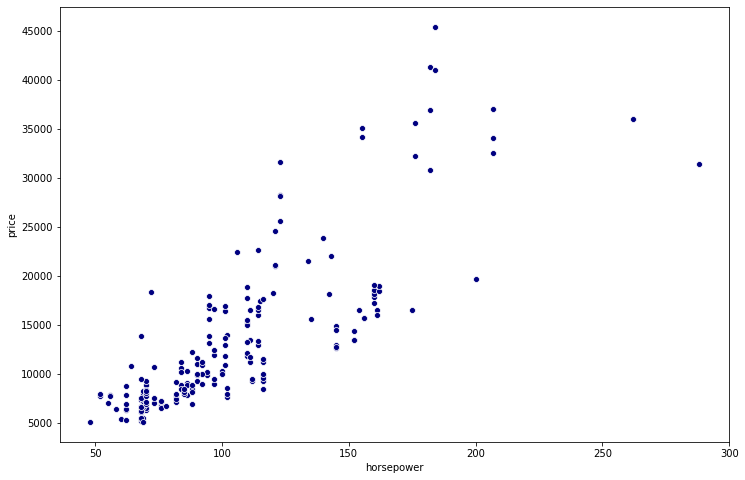

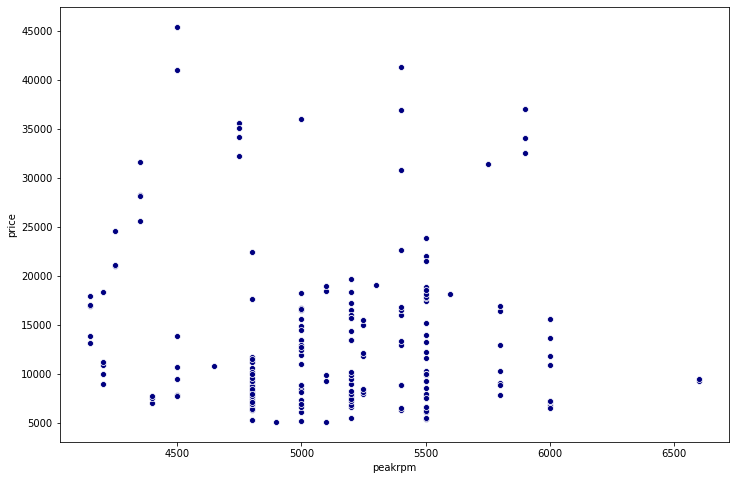

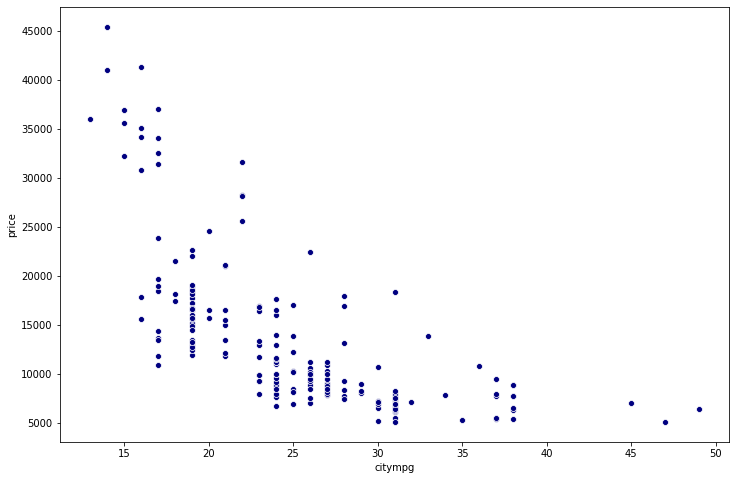

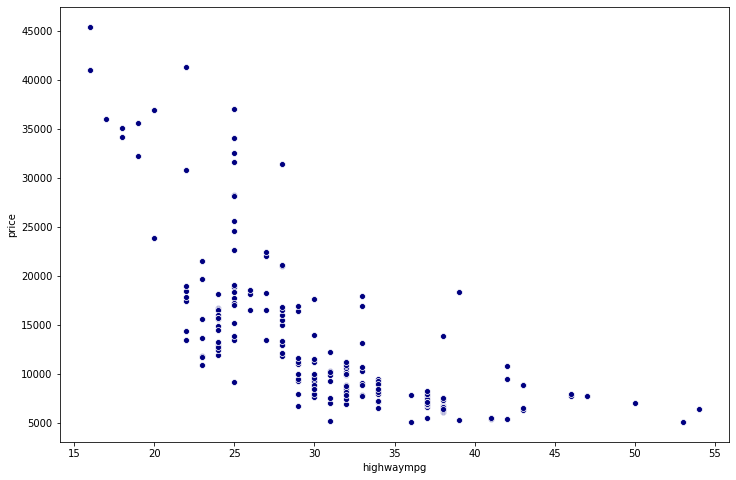

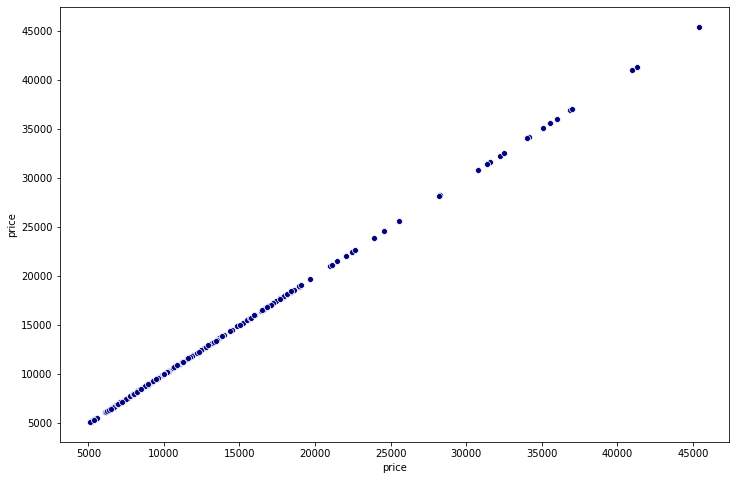

In [16]:
for i, col in enumerate (c_numeric.columns):
    plt.figure(i,figsize=(12,8))
    sns.scatterplot(x=c_numeric[col],y=c_numeric['price'],color="navy")


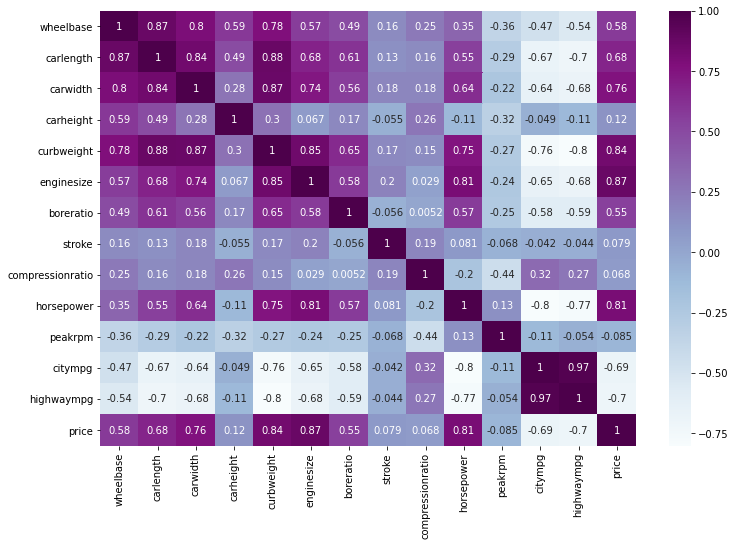

In [17]:
correalation=c_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correalation,annot=True,cmap="BuPu")

In [18]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [0]:
c['symboling'] = c['symboling'].astype('object')

In [20]:
c_names = c['CarName'].apply(lambda x: x.split(" ")[0])
c_names[:21]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
Name: CarName, dtype: object

In [21]:
c['c_comp']=c_names
c['c_comp'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
maxda           2
vw              2
renault         2
Nissan          1
mercury         1
toyouta         1
porcshce        1
vokswagen       1
Name: c_comp, dtype: int64

In [0]:
c.loc[(c['c_comp']=="vw")|(c['c_comp']=="vokswagen"),"c_comp"]="volkswagen"
c.loc[(c['c_comp']=="porcshce"),"c_comp"]="porsche"
c.loc[(c['c_comp']=="toyouta"),"c_comp"]="toyota"
c.loc[c['c_comp'] == "Nissan", 'c_comp'] = 'nissan'
c.loc[c['c_comp'] == "maxda", 'c_comp'] = 'mazda'


In [23]:
c['c_comp'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: c_comp, dtype: int64

Text(0, 0.5, 'Count of Cars')

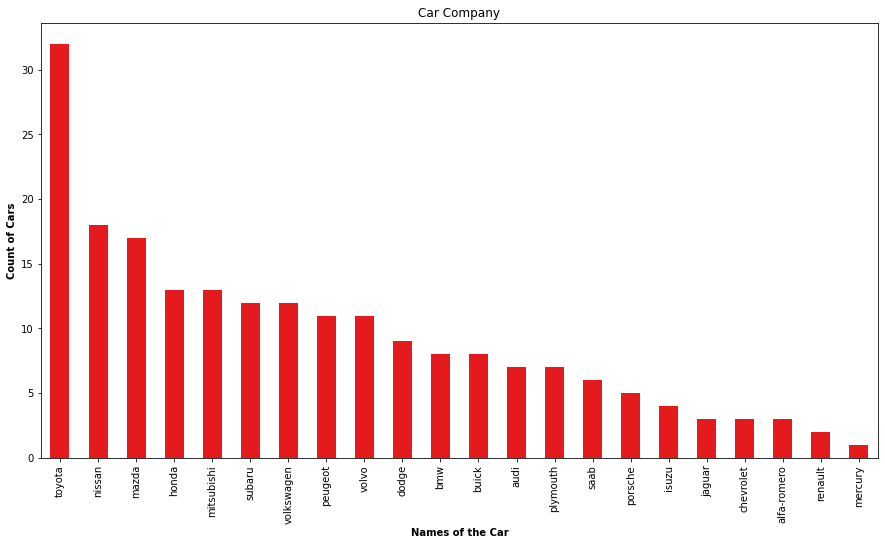

In [24]:
plt.rcParams['figure.figsize'] = [15,8]
ax=c['c_comp'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('Car Company')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

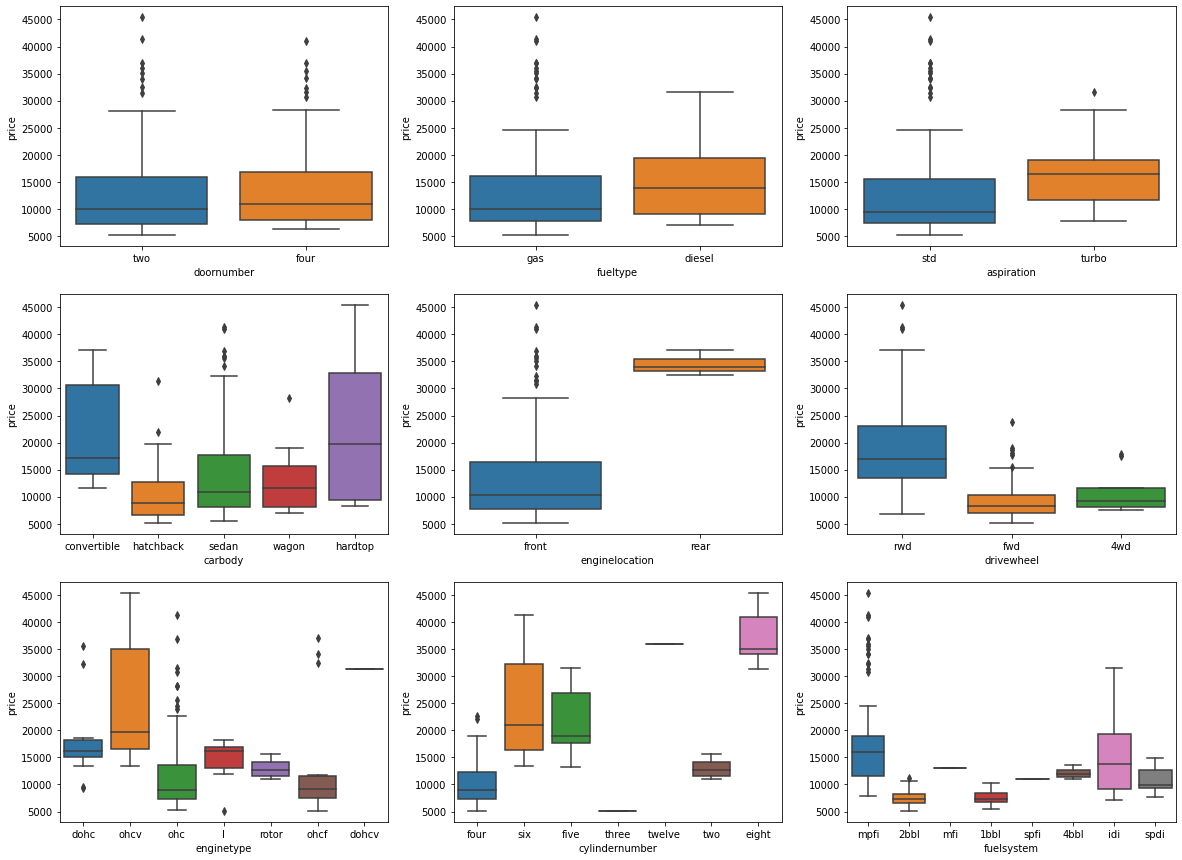

In [25]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = c)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data =  c)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data =  c)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = c)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data =  c)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = c)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data =  c)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = c)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data =  c)
plt.show()

In [0]:
c = c.drop('CarName', axis=1)

In [0]:
x=c.drop(columns=['price',"car_ID"])
y=c['price']

In [28]:
c_categ = x.select_dtypes(include=['object'])
c_categ.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,c_comp
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [29]:
c_dummy_var = pd.get_dummies(c_categ, drop_first=True)
c_dummy_var.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,c_comp_audi,c_comp_bmw,c_comp_buick,c_comp_chevrolet,c_comp_dodge,c_comp_honda,c_comp_isuzu,c_comp_jaguar,c_comp_mazda,c_comp_mercury,c_comp_mitsubishi,c_comp_nissan,c_comp_peugeot,c_comp_plymouth,c_comp_porsche,c_comp_renault,c_comp_saab,c_comp_subaru,c_comp_toyota,c_comp_volkswagen,c_comp_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
x=x.drop(columns=c_categ)
x.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [31]:
c_dummy_var.columns

Index(['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'c_comp_audi', 'c_comp_bmw',
       'c_comp_buick', 'c_comp_chevrolet', 'c_comp_dodge', 'c_comp_honda',
       'c_comp_isuzu', 'c_comp_jaguar', 'c_comp_mazda', 'c_comp_mercury',
       'c_comp_mitsubishi', 'c_comp_nissan', 'c_comp_peugeot',
       'c_comp_plymouth', 'c_comp_por

In [32]:
df_x=pd.merge(x,c_dummy_var,on=x.index)
df_x.columns

Index(['key_0', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'c_comp_audi', 'c_comp_bmw',
       'c_comp_buick', 'c_comp_chevrolet', 'c_comp_dod

In [33]:
df_x.drop(columns='key_0',inplace=True)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    int64  
 10  peakrpm                205 non-null    int64  
 11  citympg                205 non-null    int64  
 12  highwaympg             205 non-null    int64  
 13  symboling_-1           205 non-null    uint8  
 14  symboling_0            205 non-null    uint8  
 15  symbol

In [34]:
from sklearn.preprocessing import scale
cols=df_x.columns
df_x_scaled=pd.DataFrame(scale(df_x))
df_x_scaled.columns=cols
df_x_scaled.columns
df_x_scaled.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,c_comp_audi,c_comp_bmw,c_comp_buick,c_comp_chevrolet,c_comp_dodge,c_comp_honda,c_comp_isuzu,c_comp_jaguar,c_comp_mazda,c_comp_mercury,c_comp_mitsubishi,c_comp_nissan,c_comp_peugeot,c_comp_plymouth,c_comp_porsche,c_comp_renault,c_comp_saab,c_comp_subaru,c_comp_toyota,c_comp_volkswagen,c_comp_volvo
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,6.553024e-17,1.104807e-16,1.743863e-16,2.556221e-16,-3.791005e-17,3.596039e-16,2.003817e-17,-1.240200e-16,-2.147334e-16,-4.332578e-18,2.177120e-16,-1.773649e-16,-2.328760e-16,-7.582011e-17,-1.976739e-16,2.924490e-16,2.382918e-17,6.146845e-17,-8.732852e-17,2.407288e-16,-3.476894e-16,5.269498e-16,-2.263772e-16,1.538065e-16,-6.195586e-16,-3.206107e-16,-1.787188e-17,-7.040439e-17,-7.040439e-17,1.538065e-16,-1.191459e-17,-7.852797e-18,-3.533759e-16,-7.040439e-17,-3.271096e-16,2.873041e-16,-7.040439e-17,-5.751497e-16,2.239401e-16,-2.076929e-16,-2.158165e-16,-4.405690e-16,1.841346e-16,2.412704e-16,-4.251342e-17,4.744173e-16,-7.040439e-17,-4.744173e-16,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-7.251652e-16,-6.452833e-16,3.552714e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00,-3.467255e-01,-6.967835e-01,-5.980099e-01,-4.300827e-01,-3.894681e-01,-3.041381e+00,-4.692953e-01,-8.846517e-01,-2.015171e-01,-7.2008

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [0]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

y_pred_test=lm.predict(x_test)
y_pred_train=lm.predict(x_train)

In [37]:
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.9756892503873289
R-sqaure on test data: 0.838262139339907
RMSE on train data: 1213.0021196738414
RMSE on test data: 3365.4652343880903


In [0]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31))
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):
    lm = LinearRegression()
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
    rfe_n.fit(x_train, y_train)
    col_n = x_train.columns[rfe_n.support_]
    X_train_rfe_n = x_train[col_n]
    X_test_rfe_n = x_test[col_n]

    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    


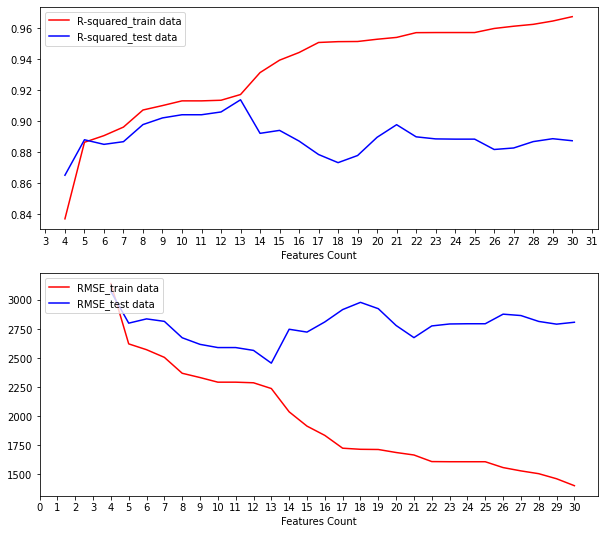

In [39]:
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(10, 9))
ax[0].plot(n_features_list, train_r2,'r', label="R-squared_train data")
ax[0].plot(n_features_list, test_r2,'b', label="R-squared_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) 

ax[1].plot(n_features_list, train_RMSE, 'r',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'b',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))

plt.show()

In [40]:
lm=LinearRegression()
rfe=RFE(lm,13)
rfe.fit(x_train,y_train)

col=x_train.columns[rfe.support_] 

X_train_13= x_train[col]
X_test_13 = x_test[col]

X_train_13 = sm.add_constant(X_train_13,has_constant='add')
X_test_13 = sm.add_constant(X_test_13,has_constant='add')

lm_sm=sm.OLS(y_train,X_train_13).fit()

y_pred_train=lm_sm.predict(X_train_13)
y_pred_test=lm_sm.predict(X_test_13)

train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)


error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('R-sqaure:')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('RMSE: ')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())


R-sqaure:
R-sq for test data is 0.9006167424476537
R-sq for train data is 0.9172871967113266
RMSE: 
RMSE for test data is 2455.655255247881
RMSE for train data is 2237.4263820988704
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sat, 30 May 2020   Prob (F-statistic):           3.47e-64
Time:                        20:52:22   Log-Likelihood:                -1305.9
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     130   BIC:                             2676.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            

Text(0.5, 0, 'Index')

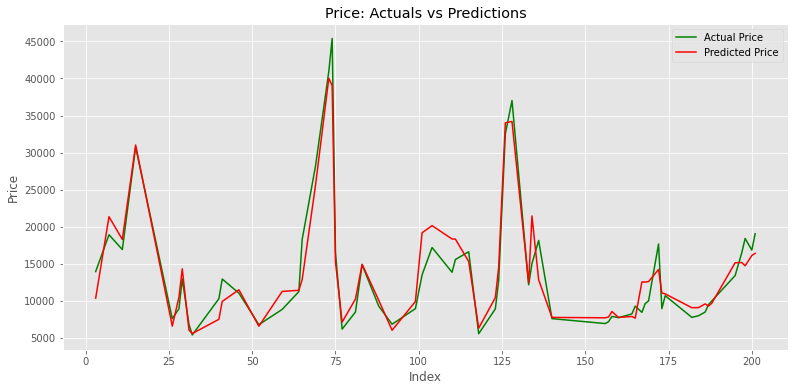

In [41]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(13,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actual Price',color='Green',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predicted Price',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

In [42]:
features_13=lm_sm.params.index
features_13=features_13[1:] 
features_13

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_twelve', 'cylindernumber_two',
       'c_comp_bmw', 'c_comp_porsche'],
      dtype='object')

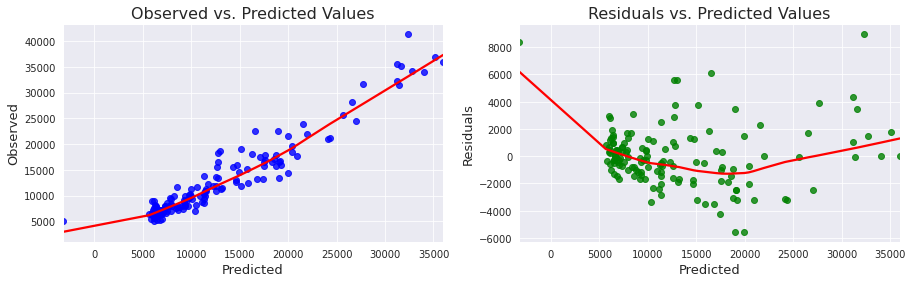

In [43]:
def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'}, color='blue')
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'},color='Green')
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
    
linearity_test(lm_sm, y_train)

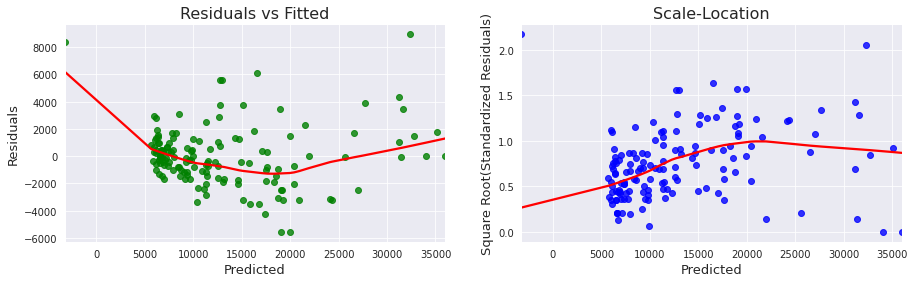

In [44]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'},color='green')
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'},color='blue')
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)

Jarque_Bera test ---- statistic: 61.7387, p-value: 3.9190872769268026e-14
Shapiro_Wilk test ---- statistic: 0.9427, p-value: 0.0000
Kolmogorov_Smirnov test ---- statistic: 0.5455, p-value: 0.0000
Anderson_Darling test ---- statistic: 1.9842, 5% critical value: 0.7660


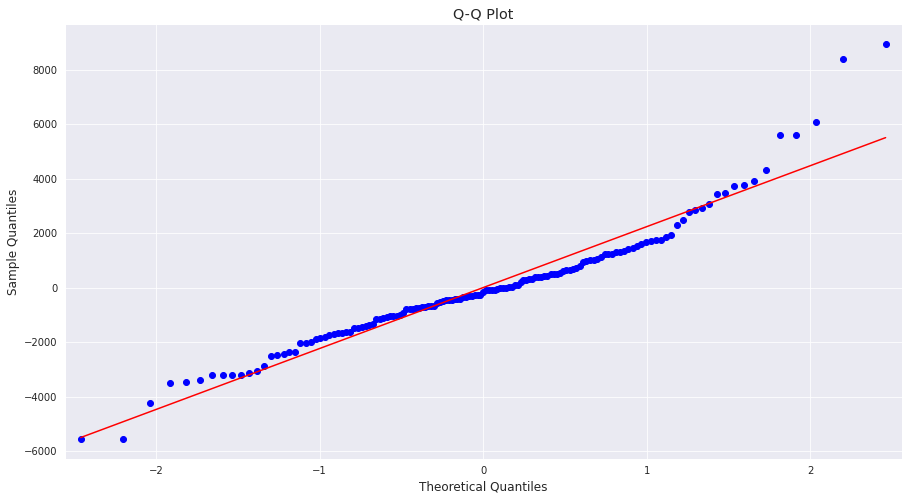

In [45]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q Plot');
    

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque_Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro_Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov_Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson_Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
   
normality_of_residuals_test(lm_sm)

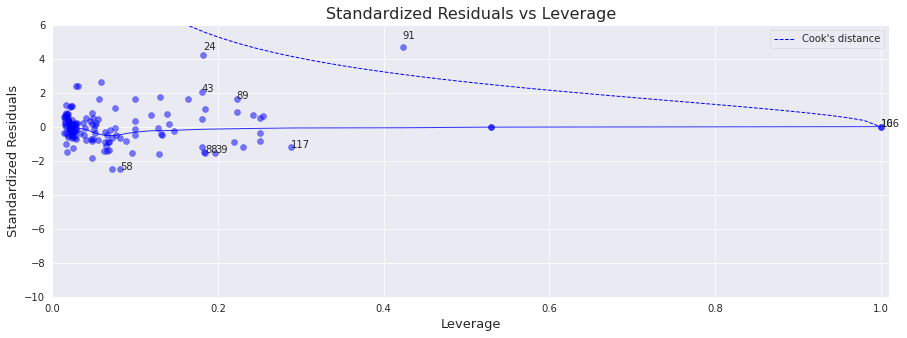

In [46]:
def influential_outlier_test(model,top_influencing_obs_count):
    
    influence = model.get_influence()

    leverage = influence.hat_matrix_diag

    cooks_d = influence.cooks_distance

    standardized_residuals = influence.resid_studentized_internal

    studentized_residuals = influence.resid_studentized_external 
    
    
    plot_lm = plt.figure(figsize=(15,5))
    plt.scatter(leverage, standardized_residuals, alpha=0.5,color='blue')
    sns.regplot(leverage, standardized_residuals,scatter=False,ci=False,lowess=True,
                line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
    plot_lm.axes[0].set_xlim(0, max(leverage)+0.01)
    plot_lm.axes[0].set_ylim(-10, 6)
    plot_lm.axes[0].set_title('Standardized Residuals vs Leverage',fontsize=16)
    plot_lm.axes[0].set_xlabel('Leverage',fontsize=13)
    plot_lm.axes[0].set_ylabel('Standardized Residuals',fontsize=13);
    
    leverage_top_n_obs = np.flip(np.argsort(cooks_d[0]), 0)[:top_influencing_obs_count]  
    
    for i in leverage_top_n_obs:
        plot_lm.axes[0].annotate(i,xy=(leverage[i],studentized_residuals[i])) 
    
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='Blue')

    p = len(lm_sm.params) 

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(leverage), 50),'Cook\'s distance')
    plt.legend(loc='upper right');
    
influential_outlier_test(model=lm_sm,top_influencing_obs_count=10)

In [47]:
X_train_no_outliers=x_train.drop(index=[16,24,91])
y_train_no_outliers=y_train.drop(index=[16,24,91])
X_train_no_outliers.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,c_comp_audi,c_comp_bmw,c_comp_buick,c_comp_chevrolet,c_comp_dodge,c_comp_honda,c_comp_isuzu,c_comp_jaguar,c_comp_mazda,c_comp_mercury,c_comp_mitsubishi,c_comp_nissan,c_comp_peugeot,c_comp_plymouth,c_comp_porsche,c_comp_renault,c_comp_saab,c_comp_subaru,c_comp_toyota,c_comp_volkswagen,c_comp_volvo
122,-0.841772,-0.548402,-0.984972,-1.199923,-0.701886,-0.695874,-1.331531,-0.081241,-0.187398,-0.915571,0.787855,0.885740,1.055193,-0.346726,-0.696784,1.672213,-0.430083,-0.389468,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,1.451227,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,5.318432,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
125,-0.708596,-0.418396,1.117866,-1.446071,0.428245,0.579974,2.258638,-0.464834,-0.162161,0.985685,0.787855,-0.953012,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,6.324555,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
166,-0.708596,-0.434647,-0.891512,-0.461478,-0.492032,-0.695874,-0.332206,-0.560733,-0.187398,0.199833,3.099650,0.119594,-0.254922,-0.346726,-0.696784,1.672213,-0.430083,-0.389468,0.328798,-0.469295,1.130388,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,2.325134,-0.249351,-0.238120
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
199,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,1.074252,-0.336970,-0.666913,1.467337,-0.052797,-1.259470,-1.273900,2.884126,-0.696784,-0.598010,-0.430083,-0.389468,0.328798,2.130854,-0.884652,-0.201517,-0.720082,-0.938474,2.683282,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,0.537874,-

In [0]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) 
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    lm = LinearRegression()

    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)  

    rfe_n.fit(X_train_no_outliers, y_train_no_outliers)

    col_n = X_train_no_outliers.columns[rfe_n.support_] 

    X_train_rfe_n = X_train_no_outliers[col_n]
    X_test_rfe_n = x_test[col_n]

    X_train_rfe_n = sm.add_constant(X_train_rfe_n,has_constant='add')


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    lm_n = sm.OLS(y_train_no_outliers, X_train_rfe_n).fit()
    
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train_no_outliers
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

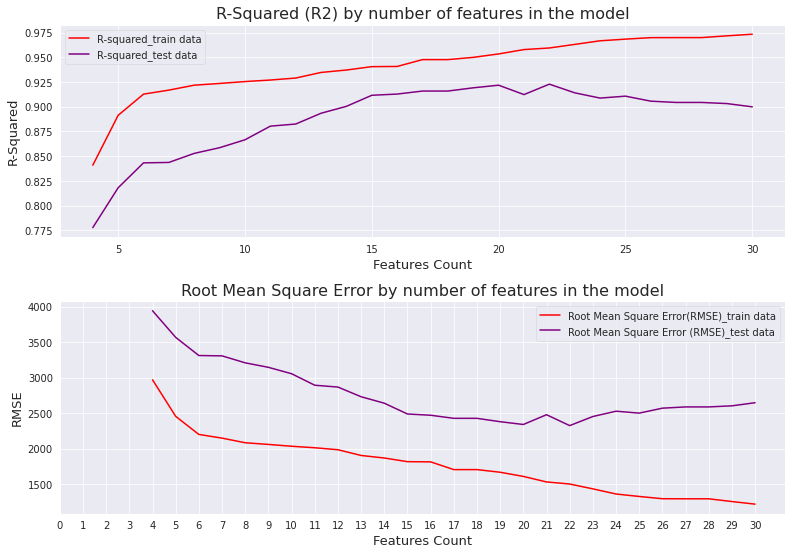

In [49]:
fig,ax=plt.subplots(2,1,figsize=(13, 9))
plt.subplots_adjust(hspace = 0.3)
ax[0].plot(n_features_list, train_r2,'b', label="R-squared_train data",color= 'Red')
ax[0].plot(n_features_list, test_r2,'g', label="R-squared_test data", color='purple')
ax[0].set_xlabel('Features Count',fontsize=13)
ax[0].set_ylabel('R-Squared',fontsize=13)
ax[0].set_title('R-Squared (R2) by number of features in the model',fontsize=16)


ax[1].plot(n_features_list, train_RMSE, 'b',label="Root Mean Square Error(RMSE)_train data",color='red')
ax[1].plot(n_features_list, test_RMSE, 'g',label="Root Mean Square Error (RMSE)_test data",color='purple')
ax[1].set_xlabel('Features Count',fontsize=13)
ax[1].set_ylabel('RMSE',fontsize=13)
ax[1].set_title('Root Mean Square Error by number of features in the model',fontsize=16)

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper right')
plt.xticks(np.arange(0,31,1))

plt.show()

In [50]:
RMSE_test_dividedby_train = [i / j for i, j in zip(test_RMSE, train_RMSE)]
RMSE_test_dividedby_train

[1.327599355360203,
 1.4534968597316584,
 1.5055980115912162,
 1.5396913319619079,
 1.5408275419255333,
 1.5276429629475428,
 1.5026127906482583,
 1.437992438060576,
 1.4449613362473301,
 1.4347313411198053,
 1.4135975027177554,
 1.3697659273681209,
 1.362346947092297,
 1.423931635254987,
 1.4239316352549891,
 1.4273034134169018,
 1.4549506534229273,
 1.6190505383576113,
 1.54832584810255,
 1.7116389191615768,
 1.8577727121594623,
 1.8856471598621813,
 1.9862219613703989,
 2.001364269450332,
 2.0014242042629746,
 2.075409529733576,
 2.1736565940907497]

In [0]:
X_new_cv = df_x_scaled.drop(index=[16,24,91])
y_new_cv = y.drop(index=[16,24,91]) 

In [52]:
X_new_cv.reset_index(inplace=True, drop=True)
X_new_cv.head(20)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,c_comp_audi,c_comp_bmw,c_comp_buick,c_comp_chevrolet,c_comp_dodge,c_comp_honda,c_comp_isuzu,c_comp_jaguar,c_comp_mazda,c_comp_mercury,c_comp_mitsubishi,c_comp_nissan,c_comp_peugeot,c_comp_plymouth,c_comp_porsche,c_comp_renault,c_comp_saab,c_comp_subaru,c_comp_toyota,c_comp_volkswagen,c_comp_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.346726,-0.696784,1.672213,-0.430083,-0.389468,0.328798,-0.469295,1.130388,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.346726,-0.696784,-0.598010,2.325134,-0.389468,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,5.318432,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.346726,-0.696784,-0.598010,2.325134,-0.389468,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,-1.188177,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.36

In [53]:
y_new_cv.reset_index(drop=True,inplace=True)
y_new_cv.head(20)

0     13495.000
1     16500.000
2     16500.000
3     13950.000
4     17450.000
5     15250.000
6     17710.000
7     18920.000
8     23875.000
9     17859.167
10    16430.000
11    16925.000
12    20970.000
13    21105.000
14    24565.000
15    30760.000
16    36880.000
17     5151.000
18     6295.000
19     6575.000
Name: price, dtype: float64

In [54]:
print(X_new_cv.shape,y_new_cv.shape)

(202, 68) (202,)


In [55]:
from sklearn.model_selection import KFold


K=5 #using 5 folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)
   
for n_features in range(5,31):
    
    train_RMSE = []
    test_RMSE = []
    train_r2=[]
    test_r2=[]
    
    for train, test in kf.split(X_new_cv):
        
        lm = LinearRegression()
        
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
        
        rfe_n.fit(X_new_cv.loc[train],y_new_cv[train])
        
        y_pred_train=rfe_n.predict(X_new_cv.loc[train])
        y_pred_test=rfe_n.predict(X_new_cv.loc[test])
        
        #R-square
        train_r2.append(r2_score(y_pred_train , y_new_cv[train]))
        test_r2.append(r2_score(y_pred_test , y_new_cv[test]))
        
        #Error
        error_train = y_pred_train - y_new_cv[train]
        error_test = y_pred_test - y_new_cv[test]
        rmse_train=((error_train**2).mean())**0.5
        rmse_test=((error_test**2).mean())**0.5
        
        train_RMSE.append(rmse_train)
        test_RMSE.append(rmse_test)
        
    test_times_train=np.mean(test_RMSE)/np.mean(train_RMSE)
         # generate report
    print('n-features:{:1} |train_R-squared:{:2} |test_R-squared:{:3} |mean(RMSE(Standard Error)_train):{:4} |mean(RMSE(Standard Error)_test):{:5} |Root Mean Square Error(test/train):{}'.
          format(n_features, round(np.mean(train_r2),4), round(np.mean(test_r2),4),
                 round(np.mean(train_RMSE),0),
                 round(np.mean(test_RMSE),0),round(test_times_train,2)))

n-features:5 |train_R-squared:0.8723 |test_R-squared:0.8138 |mean(RMSE(Standard Error)_train):2595.0 |mean(RMSE(Standard Error)_test):3180.0 |Root Mean Square Error(test/train):1.23
n-features:6 |train_R-squared:0.8917 |test_R-squared:0.8278 |mean(RMSE(Standard Error)_train):2414.0 |mean(RMSE(Standard Error)_test):3100.0 |Root Mean Square Error(test/train):1.28
n-features:7 |train_R-squared:0.9061 |test_R-squared:0.8345 |mean(RMSE(Standard Error)_train):2266.0 |mean(RMSE(Standard Error)_test):2997.0 |Root Mean Square Error(test/train):1.32
n-features:8 |train_R-squared:0.913 |test_R-squared:0.838 |mean(RMSE(Standard Error)_train):2188.0 |mean(RMSE(Standard Error)_test):2964.0 |Root Mean Square Error(test/train):1.35
n-features:9 |train_R-squared:0.92 |test_R-squared:0.8366 |mean(RMSE(Standard Error)_train):2104.0 |mean(RMSE(Standard Error)_test):2953.0 |Root Mean Square Error(test/train):1.4
n-features:10 |train_R-squared:0.9239 |test_R-squared:0.8379 |mean(RMSE(Standard Error)_train):

In [56]:
import statsmodels.api as sm

lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=6)

rfe.fit(X_new_cv, y_new_cv)

col= X_new_cv.columns[rfe.support_] 

X_final=X_new_cv[col] #X DF wuith top 6 features only

X_final= sm.add_constant(X_final,has_constant='add')

lm_sm=sm.OLS(y_new_cv,X_final).fit()

print(lm_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sat, 30 May 2020   Prob (F-statistic):           6.29e-85
Time:                        20:53:58   Log-Likelihood:                -1886.3
No. Observations:                 202   AIC:                             3787.
Df Residuals:                     195   BIC:                             3810.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.319e+04    

In [0]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(X_df): #X_df = X_train normally, in this model X=X_final
    '''
     '''
    X_df = add_constant(X_df)
    vifs = pd.Series(
        [1 / (1. - OLS(X_df[col].values, 
                       X_df.loc[:, X_df.columns != col].values).fit().rsquared) 
         for col in X_df],
        index=X_df.columns,
        name='VIF'
    )
    return vifs

In [58]:
variance_inflation_factors(X_final)

const                   1.000162
carwidth                4.229958
curbweight              7.697143
enginesize              4.766423
enginelocation_rear     1.156669
enginetype_l           11.802076
c_comp_peugeot         12.601447
Name: VIF, dtype: float64

In [59]:
X_final =X_final.loc[:,X_final.columns !='curbweight']
X_final.head()

,const,carwidth,enginesize,enginelocation_rear,enginetype_l,c_comp_peugeot
0,1.0,-0.844782,0.074449,-0.121867,-0.249351,-0.23812
1,1.0,-0.844782,0.074449,-0.121867,-0.249351,-0.23812
2,1.0,-0.190566,0.604046,-0.121867,-0.249351,-0.23812
3,1.0,0.136542,-0.431076,-0.121867,-0.249351,-0.23812
4,1.0,0.230001,0.218885,-0.121867,-0.249351,-0.23812


In [60]:
lm_sm=sm.OLS(y_new_cv,X_final).fit()

y_predictions=lm_sm.predict(X_final)


#Standard error/RMSE
error=y_predictions-y_new_cv

print('RMSE is: {}'.format(((error**2).mean())**0.5))

print(lm_sm.summary())

RMSE is: 2897.577136837461
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     241.4
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.02e-81
Time:                        20:54:11   Log-Likelihood:                -1896.9
No. Observations:                 202   AIC:                             3806.
Df Residuals:                     196   BIC:                             3826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

Text(0, 0.5, 'Car Price')

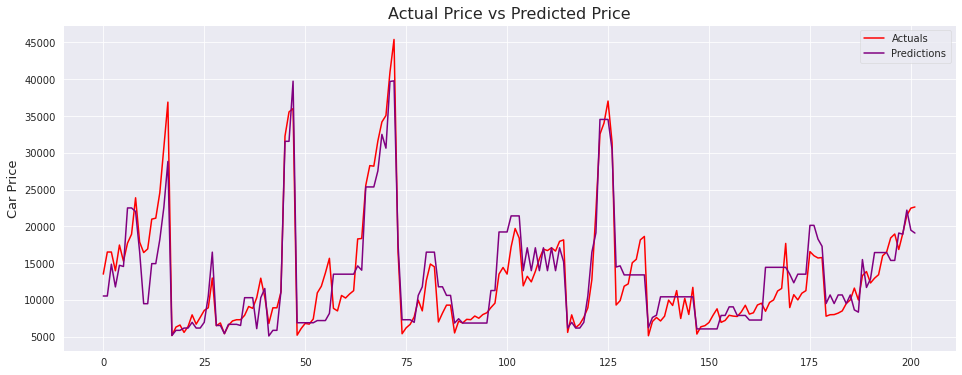

In [61]:
fig, ax=plt.subplots(figsize=(16,6))
sns.lineplot(x=y_new_cv.index,y=y_new_cv,label='Actuals',color='Red',ax=ax)
sns.lineplot(x=y_new_cv.index,y=y_predictions,label='Predictions',color='Purple',ax=ax)
ax.set_title('Actual Price vs Predicted Price', fontsize=16)
ax.set_ylabel('Car Price',fontsize=13)

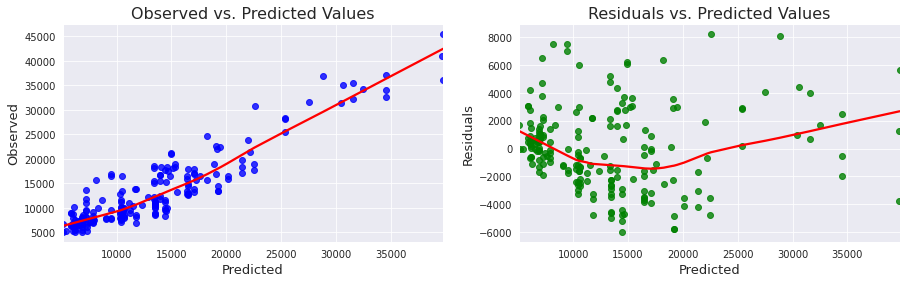

In [62]:
linearity_test(lm_sm,y_new_cv)

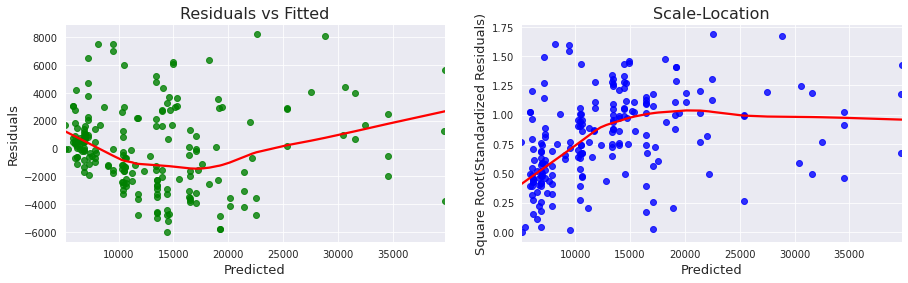

In [63]:
homoscedasticity_test(lm_sm)

Jarque_Bera test ---- statistic: 6.5391, p-value: 0.03802295487204688
Shapiro_Wilk test ---- statistic: 0.9824, p-value: 0.0126
Kolmogorov_Smirnov test ---- statistic: 0.5149, p-value: 0.0000
Anderson_Darling test ---- statistic: 0.6878, 5% critical value: 0.7720


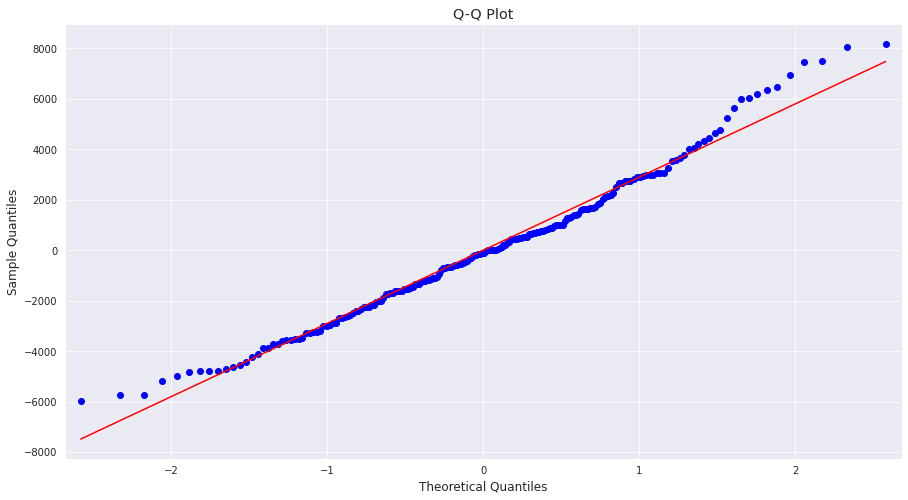

In [64]:
normality_of_residuals_test(lm_sm)